In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("salary_data_cleaned.csv")
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [4]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    
    
    

In [5]:
df["job_simp"] = df["Job Title"].apply(title_simplifier)
df["seniority"] = df["Job Title"].apply(seniority)


In [6]:
df["seniority"].value_counts()


na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [7]:
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [8]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [9]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [10]:
df['num_comp'] = df["Competitors"].apply(lambda x: len(x.split(',')) if x!= '-1' else 0)



df.num_comp

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [11]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [12]:
df[df["hourly"]==1][["hourly","min_salary","avg_salary","max_salary"]]


,hourly,min_salary,avg_salary,max_salary
165,1,34,20.5,48
177,1,42,27.5,68
197,1,36,21.5,50
202,1,42,27.5,68
210,1,30,20.0,50
246,1,34,20.5,48
271,1,42,27.5,68
337,1,36,21.5,50
345,1,48,31.5,78
357,1,42,27.5,68


In [13]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [14]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [15]:
df[['age','avg_salary','Rating','desc_len']].corr()


,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
avg_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


In [17]:
df_cat = df[[ 'Location', 'Headquarters', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'company_txt', 'job_state',
       'spark', 'aws', 'excel']]


In [19]:
df_cat.head()

,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,company_txt,job_state,spark,aws,excel
0,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),Tecolote Research,NM,0,0,1
1,"Linthicum, MD","Baltimore, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),University of Maryland Medical System,MD,0,0,0
2,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),KnowBe4,FL,1,0,1
3,"Richland, WA","Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),PNNL,WA,0,0,0
4,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Affinity Solutions,NY,0,0,1


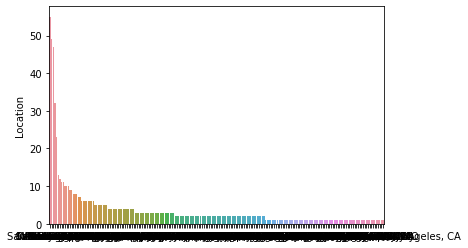

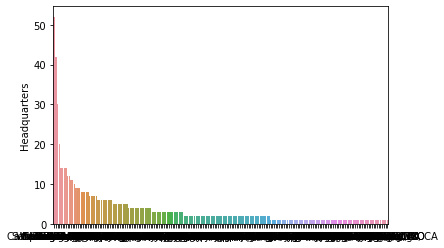

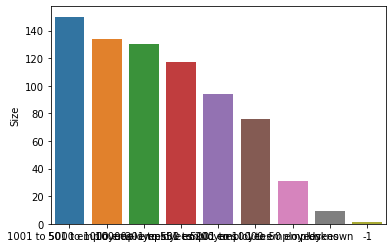

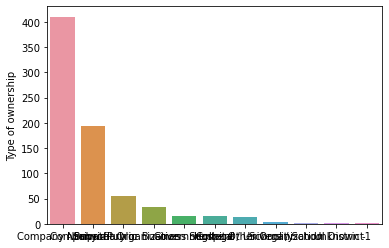

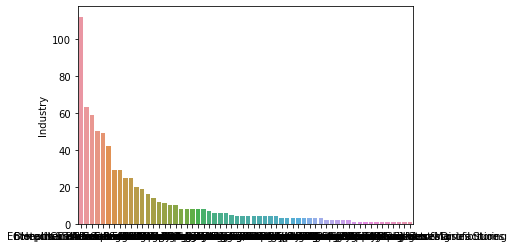

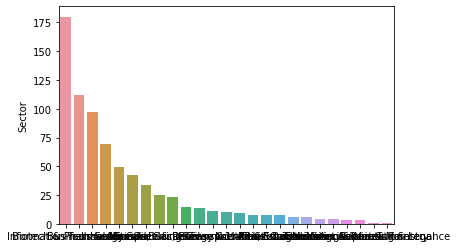

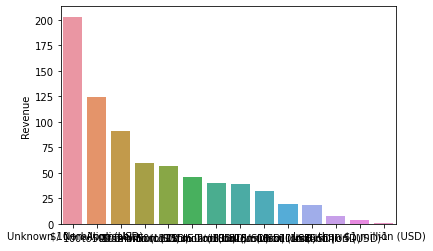

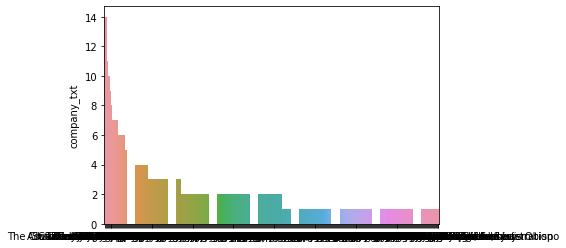

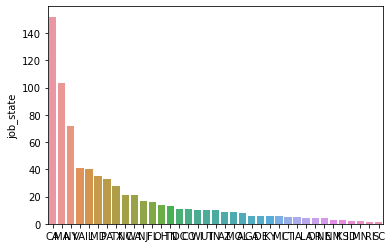

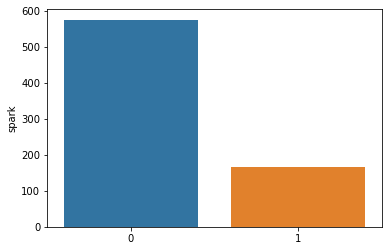

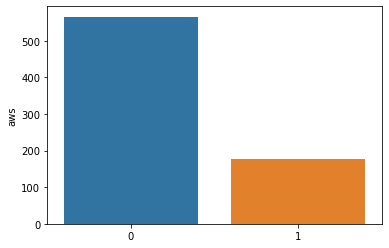

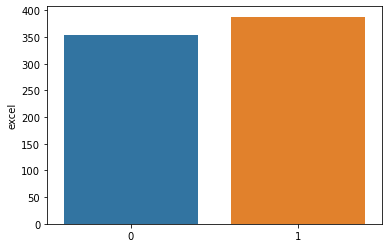

In [36]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    sns.barplot(x=cat_num.index,y=cat_num)
    plt.show()

In [39]:
print(cat_num.index)

Int64Index([1, 0], dtype='int64')


In [44]:
df[["avg_salary","job_simp"]]

,avg_salary,job_simp
0,72.0,data scientist
1,87.5,data scientist
2,85.0,data scientist
3,76.5,data scientist
4,114.5,data scientist
...,...,...
737,84.5,na
738,102.5,data engineer
739,73.5,na
740,127.5,manager
